In [42]:
import numpy as np
import pandas as pd
import tkinter as tk
import warnings as wn
import pandas_datareader as pdr
import matplotlib.pyplot as plt

from pandas import DataFrame
from sklearn import metrics
from sklearn.svm import SVC
from scipy.optimize import *
from pandas.plotting import *
from sklearn.metrics import *
from sklearn.ensemble import *
from tkinter import filedialog
from sklearn.linear_model import *
from sklearn.preprocessing import *
from sklearn.model_selection import *

wn.filterwarnings(action='always')

In [43]:
Canada = pdr.get_data_yahoo('%5EGSPTSE', start="2000-01-01", end=" 2019-04-28")
USA = pdr.get_data_yahoo('%5EGSPC', start="2000-01-01", end=" 2019-04-28")
Europe = pdr.get_data_yahoo('%5ESTOXX', start="2000-01-01", end=" 2019-04-28")
China = pdr.get_data_yahoo('000001.SS', start="2000-01-01", end=" 2019-04-28")
Japan = pdr.get_data_yahoo('%5EN225', start="2000-01-01", end=" 2019-04-28")
Singapore = pdr.get_data_yahoo('%5EFVX', start="2000-01-01", end=" 2019-04-28")

Canada.reset_index(level=0, inplace=True)
USA.reset_index(level=0, inplace=True)
Europe.reset_index(level=0, inplace=True)
China.reset_index(level=0, inplace=True)
Japan.reset_index(level=0, inplace=True)
Singapore.reset_index(level=0, inplace=True)

Canada.set_index(['Date'], inplace=True)
USA.set_index(['Date'], inplace=True)
Europe.set_index(['Date'], inplace=True)
China.set_index(['Date'], inplace=True)
Japan.set_index(['Date'], inplace=True)
Singapore.set_index(['Date'], inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas_datareader/data.py:63: ResourceWarning: unclosed <socket.socket fd=81, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('161.28.234.115', 49630), raddr=('209.73.190.11', 443)>
  return YahooDailyReader(*args, **kwargs).read()
/anaconda3/lib/python3.7/site-packages/pandas_datareader/data.py:63: ResourceWarning: unclosed <socket.socket fd=81, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('161.28.234.115', 49749), raddr=('209.73.190.12', 443)>
  return YahooDailyReader(*args, **kwargs).read()
/anaconda3/lib/python3.7/site-packages/pandas_datareader/data.py:63: ResourceWarning: unclosed <socket.socket fd=81, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('161.28.234.115', 49821), raddr=('209.73.190.12', 443)>
  return YahooDailyReader(*args, **kwargs).read()
/anaconda3/lib/python3.7/site-packages/pandas_datareader/data.py:63: ResourceWarning: unclosed <socket.soc

In [3]:
df = pd.DataFrame()

df['Jpn Adj Cls'] = Japan['Adj Close']
df['Can Adj Cls'] = Canada['Adj Close']
df['USA Adj Cls'] = USA['Adj Close']
df['Eur Adj Cls'] = Europe['Adj Close']
df['Ch Adj Cls'] = China['Adj Close']
df['Sgpr Adj Cls'] = Singapore['Adj Close']

df.fillna(method='bfill', inplace=True)

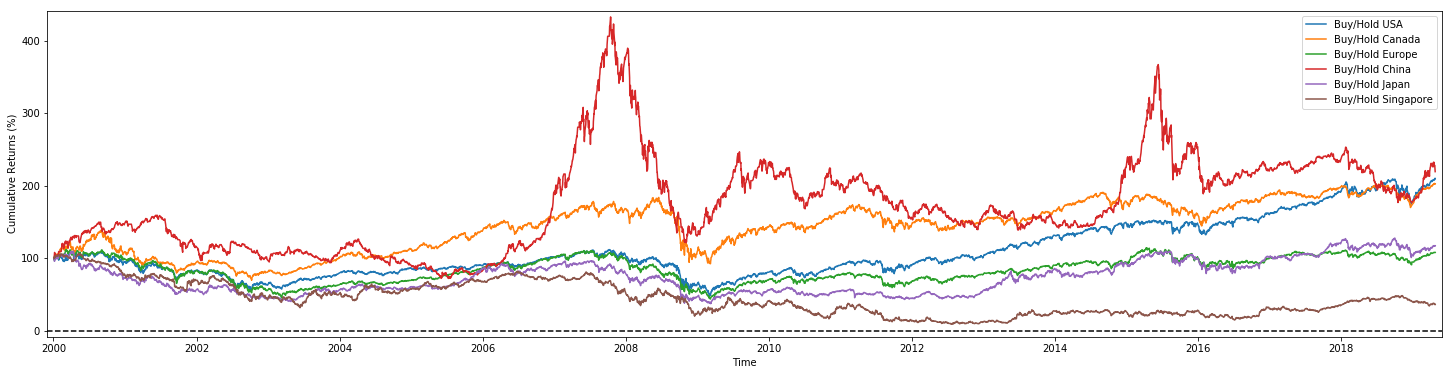

In [4]:
# Cumulative returns since 1990
BuyHold_SP = df['USA Adj Cls']/float(df['USA Adj Cls'][:1])   
BuyHold_TSX = df['Can Adj Cls']/float(df['Can Adj Cls'][:1])     
BuyHold_STOXX = df['Eur Adj Cls']/float(df['Eur Adj Cls'][:1])
BuyHold_SSE = df['Ch Adj Cls']/float(df['Ch Adj Cls'][:1])     
BuyHold_NKE = df['Jpn Adj Cls']/float(df['Jpn Adj Cls'][:1])
BuyHold_TSI = df['Sgpr Adj Cls']/float(df['Sgpr Adj Cls'][:1])

plt.figure(figsize=(25,6))
plt.plot(BuyHold_SP*100, label='Buy/Hold USA')
plt.plot(BuyHold_TSX*100, label='Buy/Hold Canada')
plt.plot(BuyHold_STOXX*100, label='Buy/Hold Europe')
plt.plot(BuyHold_SSE*100, label='Buy/Hold China')
plt.plot(BuyHold_NKE*100, label='Buy/Hold Japan')
plt.plot(BuyHold_TSI*100, label='Buy/Hold Singapore')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns (%)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()

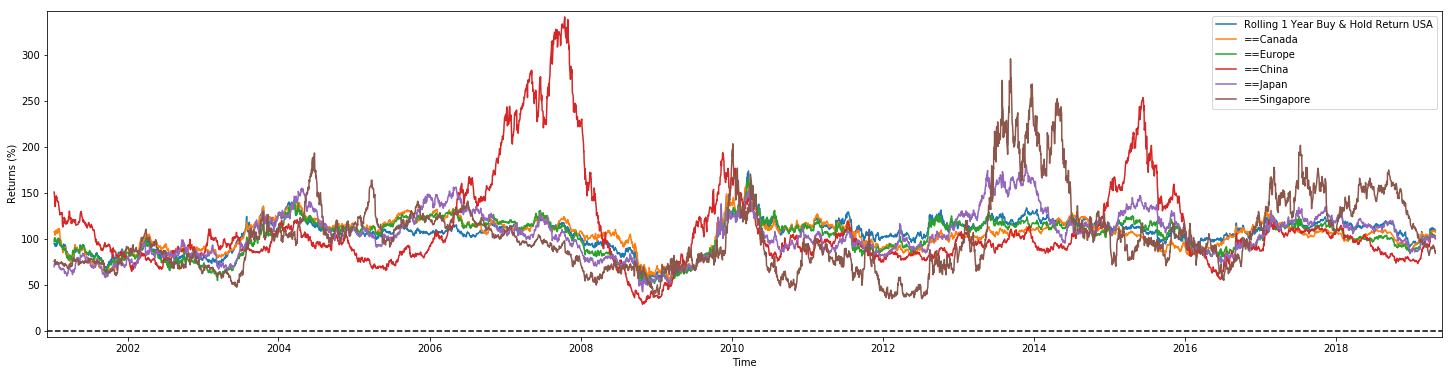

In [5]:
# Non cumulative returns since 2000
# There are 252 trading days per year. 1 year % return
SP1Y = df['USA Adj Cls']/df['USA Adj Cls'].shift(252)   
TSX1Y = df['Can Adj Cls']/df['Can Adj Cls'].shift(252)    
STOXX1Y = df['Eur Adj Cls']/df['Eur Adj Cls'].shift(252)
SSE1Y = df['Ch Adj Cls']/df['Ch Adj Cls'].shift(252)    
NKE1Y = df['Jpn Adj Cls']/df['Jpn Adj Cls'].shift(252)     
TSI1Y = df['Sgpr Adj Cls']/df['Sgpr Adj Cls'].shift(252)

plt.figure(figsize=(25,6))
plt.plot(SP1Y*100, label='Rolling 1 Year Buy & Hold Return USA')
plt.plot(TSX1Y*100, label='==Canada')
plt.plot(STOXX1Y*100, label='==Europe')
plt.plot(SSE1Y*100, label='==China')
plt.plot(NKE1Y*100, label='==Japan')
plt.plot(TSI1Y*100, label='==Singapore')
plt.xlabel('Time')
plt.ylabel('Returns (%)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()

In [6]:
# Sharpe ratio 
rfr = [2.76, .375, 1.38, 3.754, 1.936, 2.41] # rfr/country
SP1YS = (SP1Y.mean()-rfr[0])/SP1Y.std()
TSX1YS = (TSX1Y.mean()-rfr[1])/TSX1Y.std()
STOXX1YS = (STOXX1Y.mean()-rfr[2])/STOXX1Y.std()
SSE1YS = (SSE1Y.mean()-rfr[3])/SSE1Y.std()
NKE1YS = (NKE1Y.mean()-rfr[4])/NKE1Y.std()
TSI1YS = (TSI1Y.mean()-rfr[5])/TSI1Y.std()

print('SP500    1yr Buy/Hold Sharpe Ratio=',round(SP1YS,2))
print('TSX      1yr Buy/Hold Sharpe Ratio=',round(TSX1YS, 2))
print('STOXX600 1yr Buy/Hold Sharpe Ratio=',round(STOXX1YS, 2))
print('SSE      1yr Buy/Hold Sharpe Ratio=',round(SSE1YS, 2))
print('NKE      1yr Buy/Hold Sharpe Ratio=',round(TSX1YS, 2))
print('TSI      1yr Buy/Hold Sharpe Ratio=',round(TSX1YS, 2))

SP500    1yr Buy/Hold Sharpe Ratio= -10.08
TSX      1yr Buy/Hold Sharpe Ratio= 4.07
STOXX600 1yr Buy/Hold Sharpe Ratio= -1.9
SSE      1yr Buy/Hold Sharpe Ratio= -5.41
NKE      1yr Buy/Hold Sharpe Ratio= 4.07
TSI      1yr Buy/Hold Sharpe Ratio= 4.07


In [7]:
def multi(x):
    a, b, c, d = x
    return a, b, c, d 
def maximize_sharpe(x): 
    weights = (SP1Y*multi(x)[0] + TSX1Y*multi(x)[1]+ STOXX1Y*multi(x)[2] + SSE1Y*multi(x)[3])
    return -(weights.mean()/weights.std())
def constraint(x): 
    return 1 - (multi(x)[0]+multi(x)[1]+multi(x)[2]+multi(x)[3])

cons = ({'type':'ineq','fun':constraint})
bnds = ((0,1),(0,1),(0,1),(0,1))
initial_guess = (1, 0, 0, 0) 

ms = minimize(maximize_sharpe, 
              initial_guess, 
              method='SLSQP', 
              bounds=bnds,
              constraints=cons, 
              options={'maxiter': 10000})
msBuyHoldAll = (BuyHold_SP*ms.x[0] + 
                BuyHold_TSX*ms.x[1] + 
                BuyHold_STOXX*ms.x[2]
                + BuyHold_SSE*ms.x[3])
msBuyHold1yAll = (SP1Y*ms.x[0] + TSX1Y*ms.x[1] + STOXX1Y*ms.x[2] + SSE1Y*ms.x[3])

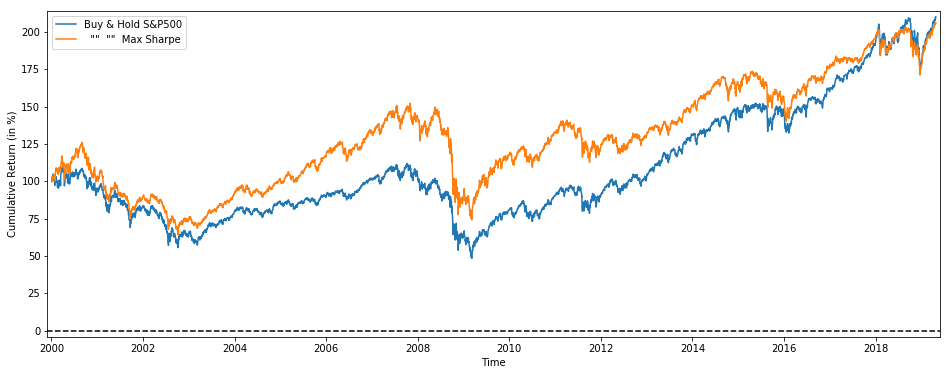

SP500 Weight = 42.43 %
TSX = 56.52 %
STOXX600 = 0.0 %
SSE = 1.05 %
Sharpe = 6.545
Median yearly excess return over SP500 = -0.5 %


In [8]:
plt.figure(figsize=(16,6))
plt.plot(BuyHold_SP*100, label='Buy & Hold S&P500')
plt.plot(msBuyHoldAll*100, label='  ""  ""  Max Sharpe')
plt.xlabel('Time')
plt.ylabel('Cumulative Return (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()
print('SP500 Weight =',round(ms.x[0]*100,2),'%')
print('TSX =',round(ms.x[1]*100,2),'%')
print('STOXX600 =',round(ms.x[2]*100,2),'%')
print('SSE =',round(ms.x[3]*100,2),'%')
print('Sharpe =',round(msBuyHold1yAll.mean()/msBuyHold1yAll.std(),3))
print('Median yearly excess return over SP500 =',round((msBuyHold1yAll.median()-SP1Y.median())*100,1),'%')

In [9]:
YTD_SP = df['USA Adj Cls'][-252:]/float(df['USA Adj Cls'][-252])-1
YTD_TSX = df['Can Adj Cls'][-252:]/float(df['Can Adj Cls'][-252])-1
YTD_STOXX = df['Eur Adj Cls'][-252:]/float(df['Eur Adj Cls'][-252])-1
YTD_SSE = df['Ch Adj Cls'][-252:]/float(df['Ch Adj Cls'][-252])-1
YTD_NKE = df['Jpn Adj Cls'][-252:]/float(df['Jpn Adj Cls'][-252])-1
YTD_TSI = df['Sgpr Adj Cls'][-252:]/float(df['Sgpr Adj Cls'][-252])-1

YTD_25Each = YTD_SP*(1/4) + YTD_TSX*(1/4) + YTD_STOXX*(1/4) + YTD_SSE*(1/4)
YTD_max_sharpe = YTD_SP*ms.x[0] + YTD_TSX*ms.x[1] + YTD_STOXX*ms.x[2] + YTD_SSE*ms.x[3]

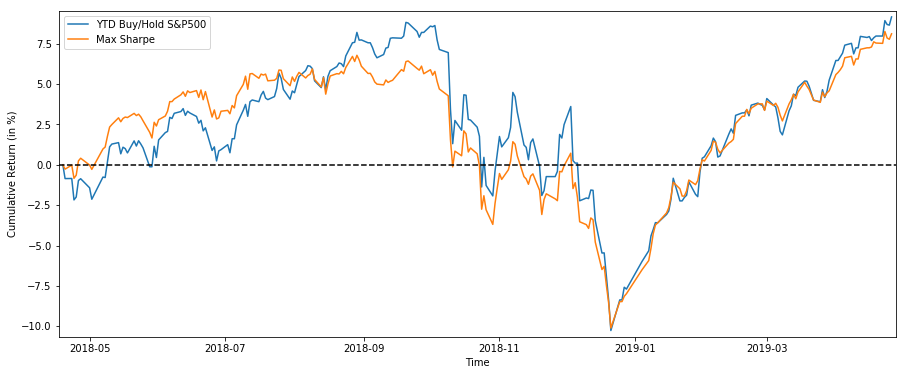

Buy & Hold S&P500 YTD Performance (at 28 April 2019) = 9.2 %
Max Sharpe = 8.1 %


In [10]:
plt.figure(figsize=(15,6))
plt.plot(YTD_SP*100, label='YTD Buy/Hold S&P500')
plt.plot(YTD_max_sharpe*100, label='Max Sharpe')
plt.xlabel('Time')
plt.ylabel('Cumulative Return (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()
print('Buy & Hold S&P500 YTD Performance (at 28 April 2019) =',round(float(YTD_SP[-1:]*100),1),'%')
print('Max Sharpe =',round(float(YTD_max_sharpe[-1:]*100),1),'%')


In [11]:
df['SPRet'] = df['USA Adj Cls']/df['USA Adj Cls'].shift(1)-1
df['SSERet'] = df['Can Adj Cls'] /df['Can Adj Cls'].shift(1)-1
df['Strat'] = df['SPRet'] * 0.8 + df['SSERet'] * 0.2
df['Strat'][SP1Y.shift(1)  > -0.17] = df['SSERet']*0 + df['SPRet']*1
df['Strat'][SSE1Y.shift(1) > 0.29] = df['SSERet']*1 + df['SPRet']*0
DynAssAll = df['Strat'].cumsum()
DynAssAll1y = df['Strat'].rolling(window=252).sum()
DynAssAllytd = df['Strat'][-251:].cumsum()

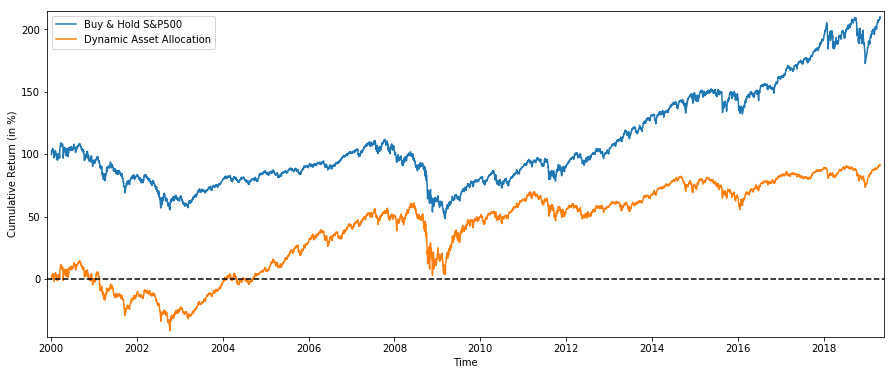

Median yearly excess return over SP500 = -102.4 %


In [12]:
plt.figure(figsize=(15,6))
plt.plot(BuyHold_SP*100, label='Buy & Hold S&P500')
plt.plot(DynAssAll*100, label='Dynamic Asset Allocation')
plt.xlabel('Time')
plt.ylabel('Cumulative Return (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()
print('Median yearly excess return over SP500 =',round(float(DynAssAll1y.median()-SP1Y.median())*100,1),'%')

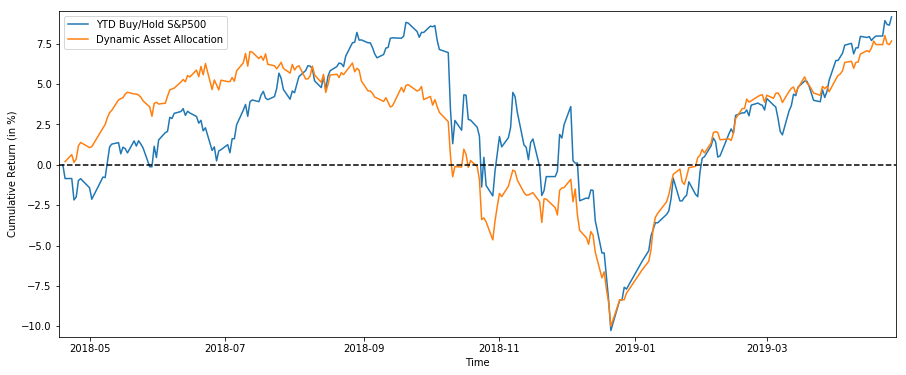

Buy & Hold S&P500 YTD Performance (at 19 April 2019) = 9.2 %
Strategy YTD Performance = 7.7 %


In [13]:
plt.figure(figsize=(15,6))
plt.plot(YTD_SP*100, label='YTD Buy/Hold S&P500')
plt.plot(DynAssAllytd*100, label='Dynamic Asset Allocation')
plt.xlabel('Time')
plt.ylabel('Cumulative Return (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()
print('Buy & Hold S&P500 YTD Performance (at 19 April 2019) =',round(float(YTD_SP[-1:]*100),1),'%')
print('Strategy YTD Performance =',round(float(DynAssAllytd[-1:]*100),1),'%')

In [14]:
SP500 = pdr.get_data_yahoo('%5EGSPC', start="2009-04-01", end=" 2019-04-30")
df = pd.DataFrame(SP500)
df['Date'] = df.index

In [15]:
df["%_Daily_Change"] = df["Close"] / df["Close"].shift(1)-1
df["3mva"] = df.Close.rolling(3).mean()
df["7mva"] = df.Close.rolling(7).mean()
df["12mva"] = df.Close.rolling(12).mean()
df["S&P500/90MVA"] = df["Close"]/df["3mva"]
df["Pred"] = np.where(df["Close"]>df["Close"].shift(),1,0)
df.dropna(inplace=True)

fv_yield = pdr.get_data_yahoo('%5EFVX', start="2009-04-01", end=" 2019-04-30")
ty_yield = pdr.get_data_yahoo('%5ETYX', start="2009-04-01", end=" 2019-04-30")
tn_yield = pdr.get_data_yahoo('%5ETNX', start="2009-04-01", end=" 2019-04-30")

df['5 tsy'] = fv_yield.Close
df['10 tsy'] = tn_yield.Close
df['30 tsy'] = ty_yield.Close

In [16]:
df_x = df[["3mva","7mva","12mva","S&P500/90MVA","5 tsy","10 tsy","30 tsy"]]
df_y = df["Pred"]

with pd.option_context('mode.use_inf_as_null', True):
    df_x = df_x.fillna(method='ffill')
    df_y = df_y.fillna(method='ffill')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, shuffle = True)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [19]:
X_test = scaler.transform(X_test) 

In [20]:
def roc_curve(y_test,y_pred_prob,pos_label=None):
    if pos_label==None:
        pos_label=1
    fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_prob,pos_label=pos_label)
    plt.plot(fpr,tpr)
    plt.xlabel("False Positive rate")
    plt.ylabel("True Positive rate")
    plt.title("ROC Curve")
    plt.xlim(0.0,1.0)
    plt.ylim(0.0,1.0)
    plt.grid(True)
    print("AUC of the model is {:.10f}".format(metrics.roc_auc_score(y_test,y_pred_prob)))
    plt.show()

LR
Accuracy:  0.8313570487483531
Precision:  0.8258928571428571
Recall:  0.8809523809523809
AUC of the model is 0.8254319427


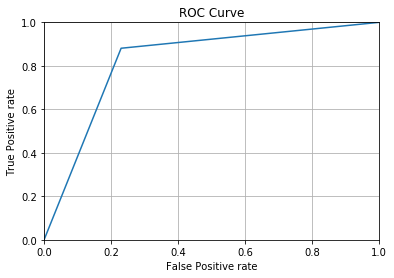

In [21]:
lr = LogisticRegression(penalty="l1", random_state=0)
lr = lr.fit(X_train,y_train)
y_predlr = lr.predict(X_test)
print('LR')
print("Accuracy: ",accuracy_score(y_test, y_predlr))
print("Precision: ",precision_score(y_test, y_predlr))
print("Recall: ",recall_score(y_test, y_predlr))

roc_curve(y_test, y_predlr, pos_label=None)

SVC
Accuracy:  0.8194993412384717
Precision:  0.8137472283813747
Recall:  0.8738095238095238
AUC of the model is 0.8130109566


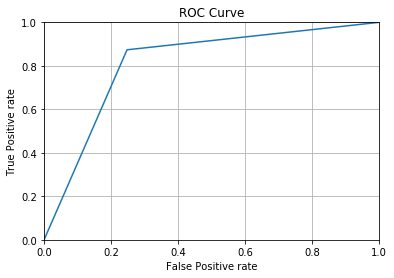

In [22]:
svm = SVC(random_state=0)
svm.fit(X_train,y_train)
y_predsvm = svm.predict(X_test)
print('SVC')
print("Accuracy: ",accuracy_score(y_test, y_predsvm))
print("Precision: ",precision_score(y_test, y_predsvm))
print("Recall: ",recall_score(y_test, y_predsvm))

roc_curve(y_test,y_predsvm,pos_label=None)

rf
Accuracy:  0.8168642951251647
Precision:  0.8259860788863109
Recall:  0.8476190476190476
AUC of the model is 0.8131900548


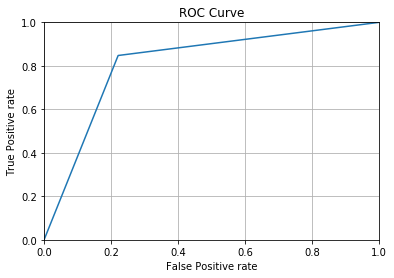

In [23]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf = rf.fit(X_train,y_train)
y_predrf = rf.predict(X_test)
print('rf')
print("Accuracy: ",accuracy_score(y_test, y_predrf))
print("Precision: ",precision_score(y_test, y_predrf))
print("Recall: ",recall_score(y_test, y_predrf))

roc_curve(y_test,y_predrf,pos_label=None)

In [24]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier(n_estimators=1, oob_score=True, random_state=0)))
models.append(('SVM', SVC()))
results = []
names = []

In [25]:
df_ = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=0)
    cv_results = cross_val_score(model, df_x, df_y, cv=kfold, scoring='accuracy')
    cv_results1 = cross_val_score(model, df_x, df_y, cv=kfold, scoring='precision')
    cv_results2 = cross_val_score(model, df_x, df_y, cv=kfold, scoring='recall')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f %f %f" % (name, cv_results.mean(), cv_results1.mean(), cv_results2.mean())
    df_.append([name, cv_results.mean(), cv_results1.mean(), cv_results2.mean()])
    print(msg)

LR: 0.575371 0.579243 0.828198
RF: 0.671438 0.628395 0.547238
SVM: 0.548470 0.548611 0.990233


In [26]:
df_models = pd.DataFrame(df_, columns=["Model","Accuracy","Precision","Recall"])
df_models.values

array([['LR', 0.5753711892928424, 0.5792425977517995, 0.8281983817796966],
       ['RF', 0.6714381872969906, 0.6283951687257975, 0.5472383648646625],
       ['SVM', 0.5484702383281806, 0.5486107902217665,
        0.9902333468146617]], dtype=object)

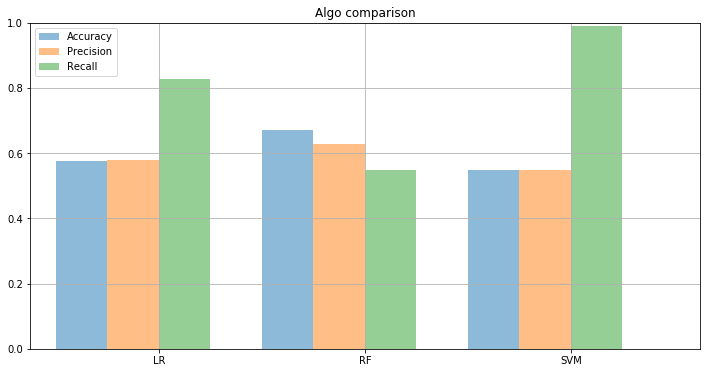

In [27]:
pos = list(range(len(df_models['Accuracy']))) 
width = 0.25 
fig, ax = plt.subplots(figsize=(12,6))
plt.bar(pos, df_models['Accuracy'],width,alpha=0.5,label=df_models['Model'][0])
plt.bar([p + width for p in pos], df_models['Precision'],width,alpha=0.5,label=df_models['Model'][1])
plt.bar([p + width*2 for p in pos], df_models['Recall'],width,alpha=0.5,label=df_models['Model'][2])
ax.set_title('Algo comparison')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(df_models['Model'])
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, 1] )
plt.legend(['Accuracy', 'Precision', 'Recall'], loc='upper left')
plt.grid()
plt.show()

In [28]:
df = df[['Date', 'Close', 'Volume']]

In [29]:
def returns(model):
    spy = df
    spy1 = spy[["Date","Close"]]
    spy1["PctChange"] = spy1["Close"].pct_change()
    spy1 = spy1.fillna(0)
    pc = spy1["PctChange"]
    spy = spy1["PctChange"]
    pred = model.predict(df_x)
    spy1["pred"] = pred
    pred1 = np.where(pred>0.0,1,-1)
    spy1["pred1"] = pred1
    pct1 = pred1 * pc
    spy1["pct1"] = pct1
    pct2 = pct1 + 1.0
    spy1["pct2"] = pct2
    pctc = np.cumprod(pct2)
    spy1["pctc"] = pctc
    inv = 100000.0 * pctc 
    spy1["Inv"] = inv
    return spy1["Inv"]

Ilr = returns(lr)
Irf = returns(rf)
Isvm = returns(svm)

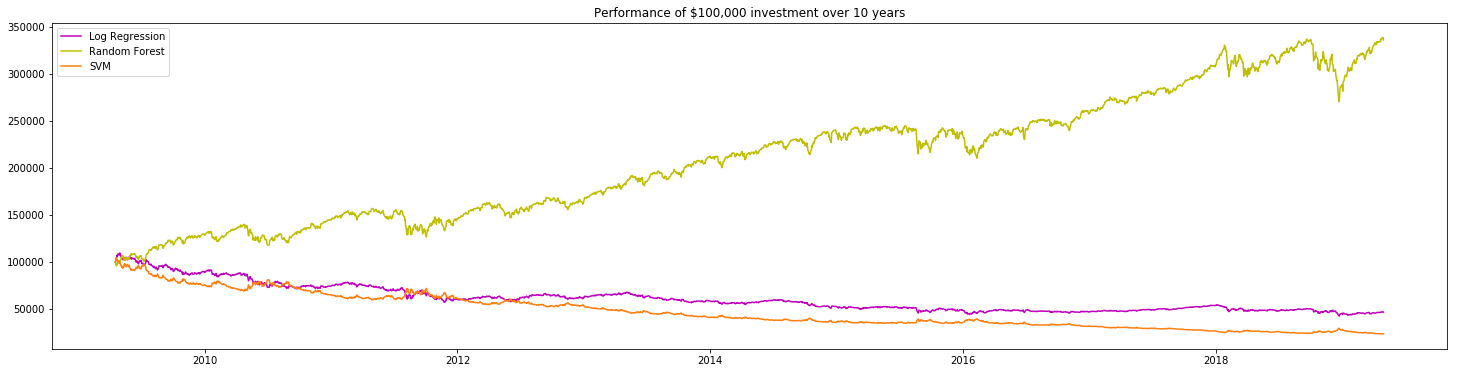

In [30]:
df_date = df['Date']
plt.figure(figsize=(25,6))
plt.plot(df_date, Ilr,label = "Log Regression", color = "m")
plt.plot(df_date, Irf,label = "Random Forest", color = "y") 
plt.plot(df_date, Isvm,label = "SVM", color = "C1") 
plt.title("Performance of $100,000 investment over 10 years")
plt.legend()
plt.show()

____________________________________________________________________________________________________________________________________________________